## Time Series EDA

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [49]:
import pandas_datareader as pdr
key='94faa34b39f1200bcdd18f454dea029c3b90d495'


In [51]:
df = pdr.get_data_tiingo('NFLX', api_key=key)
df.to_csv('NFLX.csv')

C:\Users\zmao\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [53]:
df = pd.read_csv('NFLX.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NFLX,2017-05-01 00:00:00+00:00,155.35,157.70,151.6100,151.910,8964849,155.35,157.70,151.6100,151.910,8964849,0.0,1.0
1,NFLX,2017-05-02 00:00:00+00:00,156.45,156.50,154.6100,155.760,4983533,156.45,156.50,154.6100,155.760,4983533,0.0,1.0
2,NFLX,2017-05-03 00:00:00+00:00,155.59,156.54,154.8800,156.290,3864199,155.59,156.54,154.8800,156.290,3864199,0.0,1.0
3,NFLX,2017-05-04 00:00:00+00:00,157.25,157.90,154.5500,155.590,5345797,157.25,157.90,154.5500,155.590,5345797,0.0,1.0
4,NFLX,2017-05-05 00:00:00+00:00,156.60,158.59,155.9000,158.550,5316045,156.60,158.59,155.9000,158.550,5316045,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,NFLX,2022-04-25 00:00:00+00:00,209.91,216.66,204.5100,213.810,28152045,209.91,216.66,204.5100,213.810,28152045,0.0,1.0
1256,NFLX,2022-04-26 00:00:00+00:00,198.40,209.15,198.2773,208.800,20064274,198.40,209.15,198.2773,208.800,20064274,0.0,1.0
1257,NFLX,2022-04-27 00:00:00+00:00,188.54,200.19,187.7700,194.005,22298394,188.54,200.19,187.7700,194.005,22298394,0.0,1.0
1258,NFLX,2022-04-28 00:00:00+00:00,199.52,201.48,185.6000,191.560,21363162,199.52,201.48,185.6000,191.560,21363162,0.0,1.0


In [56]:
def date_index(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace = True)
    return df


In [57]:
stock = date_index(df)

In [58]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-05-01 00:00:00+00:00 to 2022-04-29 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1260 non-null   object 
 1   close        1260 non-null   float64
 2   high         1260 non-null   float64
 3   low          1260 non-null   float64
 4   open         1260 non-null   float64
 5   volume       1260 non-null   int64  
 6   adjClose     1260 non-null   float64
 7   adjHigh      1260 non-null   float64
 8   adjLow       1260 non-null   float64
 9   adjOpen      1260 non-null   float64
 10  adjVolume    1260 non-null   int64  
 11  divCash      1260 non-null   float64
 12  splitFactor  1260 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.8+ KB


In [60]:
stock.isna().sum()

symbol         0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

<AxesSubplot:xlabel='date'>

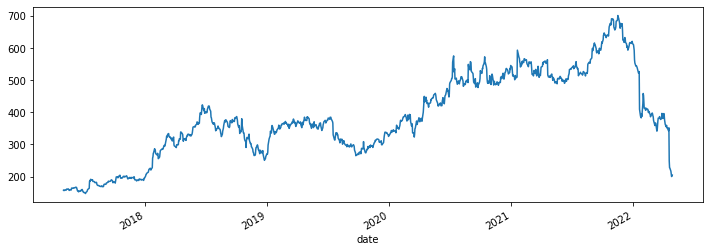

In [61]:
stock['high'].plot(figsize = (12,4))

### Time Resampling

In [62]:
#year end frequency
stock.resample(rule='A').min()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NFLX,146.17,147.27,144.25,146.130,2160300,146.17,147.27,144.25,146.130,2160300,0.0,1.0
2018-12-31 00:00:00+00:00,NFLX,201.07,201.65,195.42,196.100,3577717,201.07,201.65,195.42,196.100,3577717,0.0,1.0
2019-12-31 00:00:00+00:00,NFLX,254.59,265.00,252.28,255.710,2019322,254.59,265.00,252.28,255.710,2019322,0.0,1.0
2020-12-31 00:00:00+00:00,NFLX,298.84,322.90,290.25,302.395,1143952,298.84,322.90,290.25,302.395,1143952,0.0,1.0
2021-12-31 00:00:00+00:00,NFLX,484.98,488.57,478.54,479.750,1287513,484.98,488.57,478.54,479.750,1287513,0.0,1.0
2022-12-31 00:00:00+00:00,NFLX,188.54,200.19,185.60,191.560,3063783,188.54,200.19,185.60,191.560,3063783,0.0,1.0


In [63]:
stock.resample(rule='A').max()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NFLX,202.68,204.3800,198.09,201.95,40126110,202.68,204.3800,198.09,201.95,40126110,0.0,1.0
2018-12-31 00:00:00+00:00,NFLX,418.97,423.2056,413.08,421.38,58410362,418.97,423.2056,413.08,421.38,58410362,0.0,1.0
2019-12-31 00:00:00+00:00,NFLX,385.03,385.9900,378.80,382.77,38462343,385.03,385.9900,378.80,382.77,38462343,0.0,1.0
2020-12-31 00:00:00+00:00,NFLX,556.55,575.3700,541.00,567.98,24991528,556.55,575.3700,541.00,567.98,24991528,0.0,1.0
2021-12-31 00:00:00+00:00,NFLX,691.69,700.9894,686.09,692.35,32637450,691.69,700.9894,686.09,692.35,32637450,0.0,1.0
2022-12-31 00:00:00+00:00,NFLX,597.37,609.9900,590.56,605.61,132644607,597.37,609.9900,590.56,605.61,132644607,0.0,1.0


<AxesSubplot:xlabel='date'>

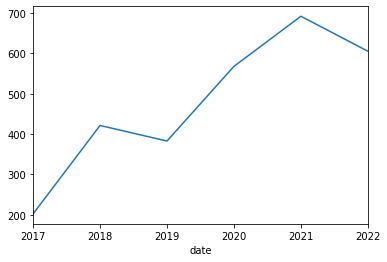

In [65]:
stock.resample(rule='A').max()['open'].plot()

<AxesSubplot:xlabel='date'>

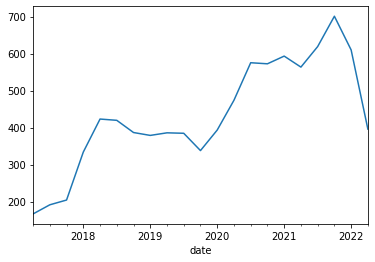

In [66]:
#quaterly start frequency
stock.resample(rule='QS').max()['high'].plot()

In [68]:
df1 = stock.reset_index()['close']

In [69]:
df1

0       155.35
1       156.45
2       155.59
3       157.25
4       156.60
         ...  
1255    209.91
1256    198.40
1257    188.54
1258    199.52
1259    190.36
Name: close, Length: 1260, dtype: float64

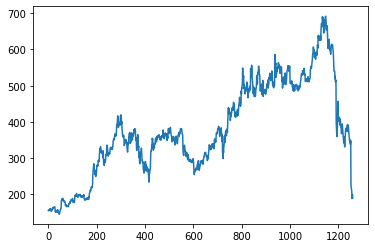

In [70]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
df1.shape

(1260, 1)

In [73]:
#timer series train and test split 
train_size = int(len(df1)*0.65)
test_size=len(df1)-train_size
train,test = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [74]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [75]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [76]:
print(X_train.shape), print(y_train.shape)

(718, 100)
(718,)


(None, None)

In [77]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [78]:
#reshape input to be [samples, time steps, features] for LSTM
# convert into 3 dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [79]:
X_train

array([[[0.01682798],
        [0.01884441],
        [0.01726793],
        ...,
        [0.07048321],
        [0.07242631],
        [0.07211468]],

       [[0.01884441],
        [0.01726793],
        [0.0203109 ],
        ...,
        [0.07242631],
        [0.07211468],
        [0.07810896]],

       [[0.01726793],
        [0.0203109 ],
        [0.01911937],
        ...,
        [0.07211468],
        [0.07810896],
        [0.07548761]],

       ...,

       [[0.4355844 ],
        [0.41540182],
        [0.40841766],
        ...,
        [0.62994941],
        [0.6075121 ],
        [0.61277313]],

       [[0.41540182],
        [0.40841766],
        [0.36720927],
        ...,
        [0.6075121 ],
        [0.61277313],
        [0.64063646]],

       [[0.40841766],
        [0.36720927],
        [0.39954539],
        ...,
        [0.61277313],
        [0.64063646],
        [0.62754803]]])

In [80]:
#create stack LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [81]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 142ms/step - loss: 0.0329 - val_loss: 0.0671
Epoch 2/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0073 - val_loss: 0.0121
Epoch 3/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0039 - val_loss: 0.0199
Epoch 4/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0029 - val_loss: 0.0144
Epoch 5/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0024 - val_loss: 0.0075
Epoch 6/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0021 - val_loss: 0.0068
Epoch 7/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 8/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0020 - val_loss: 0.0079
Epoch 9/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0019 - val_loss: 0.0063
Epoch 10/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0018 - val_loss: 0.005

In [84]:
import tensorflow as tf

In [85]:
#prediciton and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [86]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [87]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

331.7545245562404

In [88]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

506.8422770715041

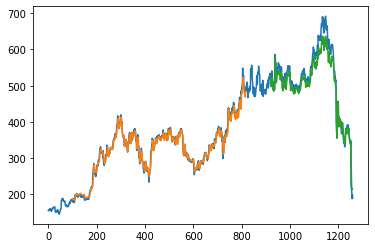

In [89]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [91]:
len(test)

441

In [92]:
x_input = test[341:].reshape(1,-1)

In [93]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [94]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1212178]
101
1 day input [0.88339566 0.85208608 0.85329594 0.84028083 0.82823728 0.84116073
 0.8155338  0.80759642 0.82044655 0.84094075 0.85802537 0.8577504
 0.85597228 0.85155448 0.85124285 0.85408418 0.83639463 0.82710075
 0.81569878 0.77238231 0.74629711 0.72387813 0.72166007 0.72347485
 0.71683898 0.68380628 0.69570318 0.66840812 0.67768368 0.66373369
 0.46071638 0.44174366 0.40374322 0.3914247  0.44091876 0.43662927
 0.51504986 0.57002493 0.51933935 0.4755646  0.48394193 0.4691487
 0.47177005 0.488928   0.47679278 0.44936941 0.45901159 0.47897419
 0.46177959 0.44086376 0.44933275 0.42383414 0.40564966 0.44702302
 0.44843452 0.4552537  0.44007552 0.42869189 0.40676785 0.39514592
 0.37412011 0.35853864 0.38975656 0.38605367 0.35589896 0.33883267
 0.36218654 0.38744684 0.41287212 0.42973676 0.41871975 0.43398959
 0.41853644 0.42077284 0.41736325 0.42590556 0.4503043  0.43133157
 0.41871975 0.41666667 0.4497177  0.42891186 0.40728113 0.39591582
 0.3844222  0.36997727 0.36282813 0.

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [100]:
len(df1)

1260

In [98]:
df2 = df1.tolist()
df2.extend(lst_output)

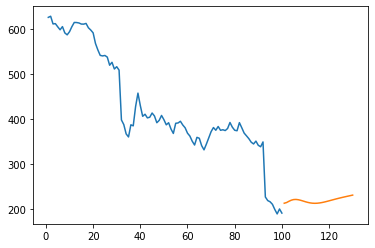

In [101]:
plt.plot(day_new,scaler.inverse_transform(df1[1160:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

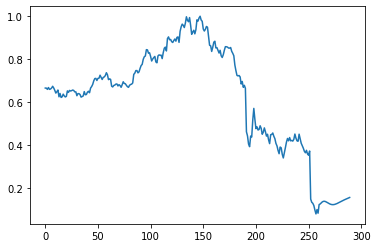

In [106]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1000:])